In [1]:
import os
import pandas as pd
import numpy as np
import IPython
import seaborn as sns

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
print(os.listdir())
os.listdir('life-expectancy-who')

['.ipynb_checkpoints', 'ife.png', 'jjj.jpeg', 'Life Expectancy Prediction.ipynb', 'life-expectancy-who', 'life-expectancy-who.zip', 'life_expectancy.html', 'neppp.html', 'Pandas Profiling.ipynb', 'test.py', '__pycache__']


['Life Expectancy Data.csv']

In [3]:
df = pd.read_csv('life-expectancy-who/Life Expectancy Data.csv', parse_dates=True)

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
new_columns= []
columns = list(df.columns)
for col in list(df.columns):
    a = col.split()
    b = '_'.join(a)
    new_columns.append(b)
df.columns =new_columns

In [8]:
# Checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [9]:
#Checking the statistical information of the numerical dataset

df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


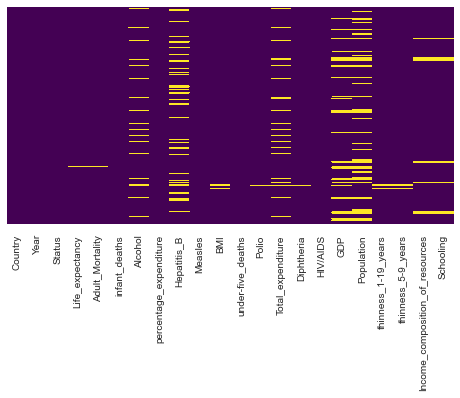

In [10]:
#Cheching the distribution of missing value in the data, where hite spaces denote missing value

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

### OOPS!!!

Even our target column (Life_expectancy) has missing values, we need to look into this.

------------------
------------------

In [11]:
df[df['Life_expectancy'].isnull()]
#df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


These countries don't look very familiar, let's check how many times these countries appeared in the dataset.

In [12]:
df.Country.value_counts().tail(15)

Serbia                         16
United Republic of Tanzania    16
Angola                         16
Belarus                        16
Sweden                         16
Dominica                        1
Marshall Islands                1
Tuvalu                          1
Niue                            1
Saint Kitts and Nevis           1
Cook Islands                    1
Palau                           1
San Marino                      1
Nauru                           1
Monaco                          1
Name: Country, dtype: int64

##### They appeared only ones, pheeeew! 

Well it is safe to drop them. We will be dropping them after dealing with the other missing data using interpolation.

In [13]:
col = list(df.select_dtypes(include=['int64', 'float64']).columns)
col.remove('Life_expectancy')
col.remove('Adult_Mortality')
df[col]=df[col].interpolate(axis=1)

In [14]:
df.shape

(2938, 22)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(2928, 22)

In [17]:
df.Country.value_counts(ascending=True).tail(15)

Germany                16
Greece                 16
Algeria                16
Chile                  16
New Zealand            16
Armenia                16
Antigua and Barbuda    16
Mauritius              16
Libya                  16
Sierra Leone           16
Burkina Faso           16
Portugal               16
Maldives               16
Mali                   16
Tunisia                16
Name: Country, dtype: int64

In [18]:
df.tail()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.0,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.0,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.0,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.0,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000.0,Developing,46.0,665.0,24.0,1.68,0.0,79.0,1483.0,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [19]:
df[['Country', 'Status']]=df[['Country', 'Status']].astype('category')

In [20]:
#report = ProfileReport(df)
#report.to_file('neppp.html')

# Graphical Exploratory Data Analysis

In [21]:
#Creating a function that check the correlation between

def heatmap(data, country):
    a = df['Country'].value_counts()
    b = list(a.index)
    assert country in b, 'country not found in dataset'
    correlation = df[df['Country']==country].corr()*100
    plt.figure(figsize=(12,7))
    sns.heatmap(correlation, annot = True, cbar=False, cmap = 'viridis')

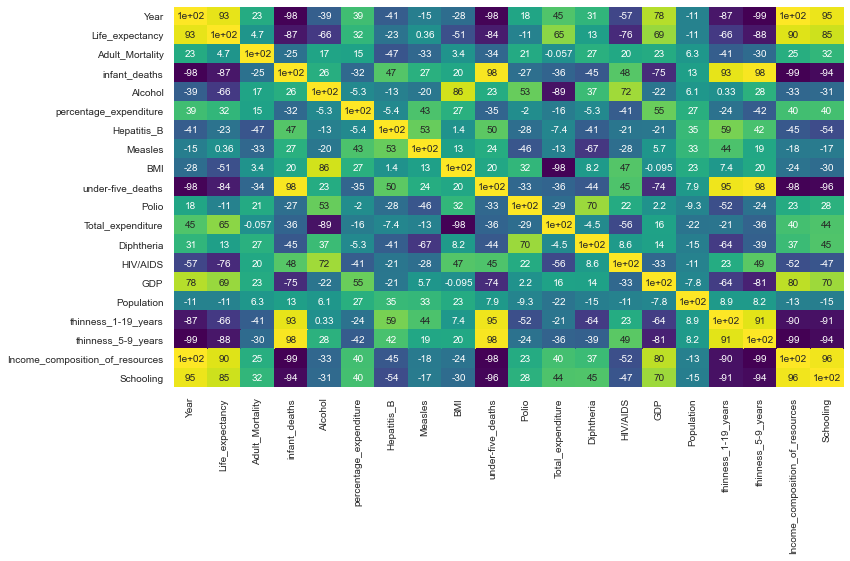

In [22]:
heatmap(df, 'Russian Federation')

----------------

In [23]:
def plot(data, col, x_val, y_val, specific, save=False, save_name=None):
    '''Take in 5 argument
    data : dataframe containing the data
    col : categorical column in the dataset
    x_val : the value to be on the x axis of the plot
    y_val : the value to be on the y axis of the plot
    specific :  the category in the categorical column to be specialized on
    save(optional) : Boolean, determines if the plot should be saved to file or not
    save_name(depend on save) : if save is True, then save_name must be entered'''
    plt.grid(True)
    df = data[data[col] == specific]
    x = df[x_val]
    y = df[y_val]
    plt.plot(x, y, linestyle = '--')
    plt.scatter(x, y, c='r', marker='x')
    plt.xlabel(x_val)
    plt.ylabel(y_val)
    plt.title(f'{x_val} against {y_val} ({specific})', fontsize=20)
    if save:
        plt.savefig(save_name)   
    plt.show()

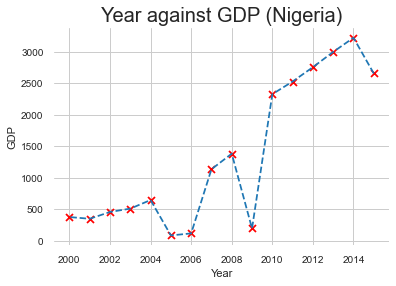

In [24]:
plot(df,'Country', 'Year', 'GDP','Nigeria')#, save=True, save_name='ife')

In [25]:
df['Life_expectancy'].max()

89.0

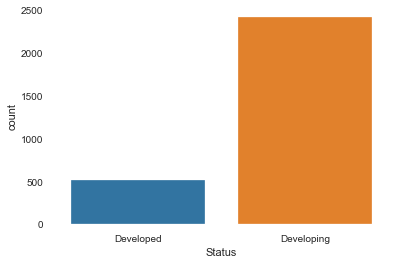

In [27]:
sns.countplot(x='Status', data=df)

We have a bias in the Status column as we have more Developing countries than Developed countrties

In [28]:
#report = ProfileReport(df)
#report.to_widgets()

Text(0.5, 1.0, 'Country v GDP')

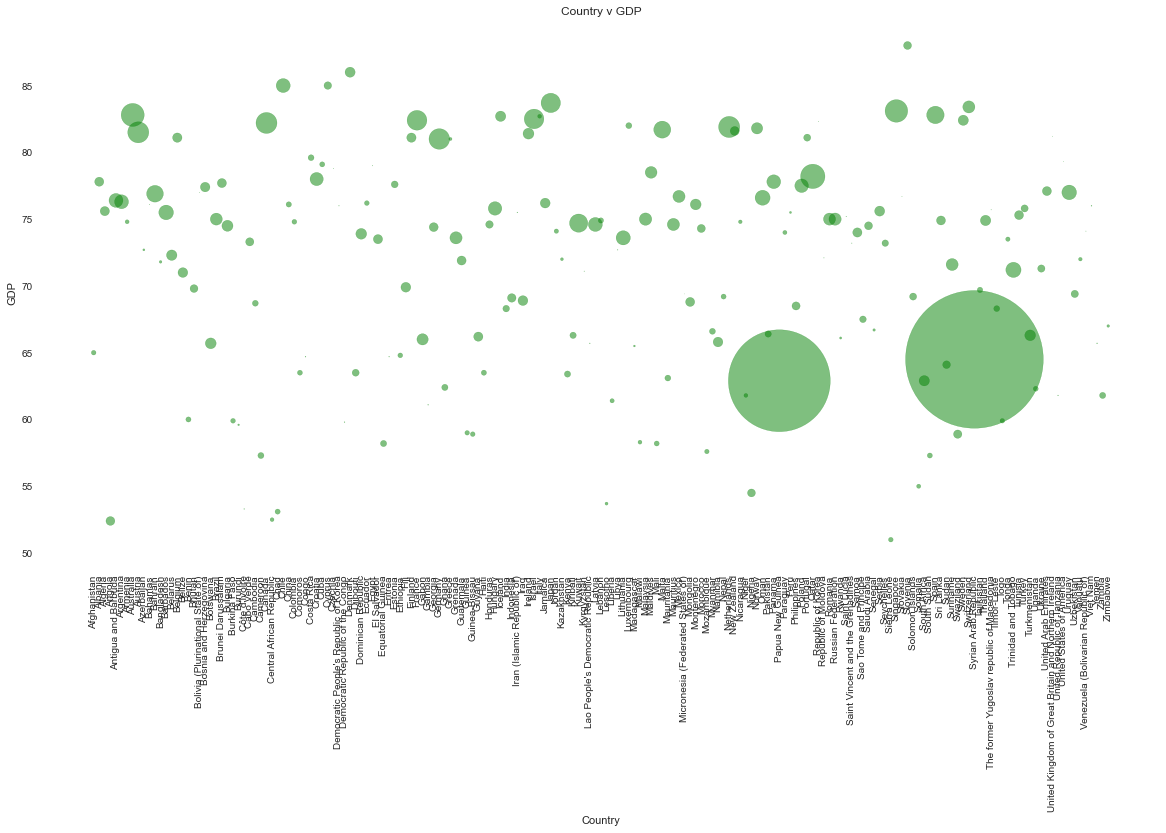

In [29]:
dd = df[df['Year']==2015]
dd.reset_index(drop=True, inplace=True)
plt.figure(figsize=(20,10))
plt.scatter(x=dd.Country, y=dd['Life_expectancy'], alpha=0.5, marker='.', c='g', s=dd['GDP']**0.7)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation = 90)
plt.title('Country v GDP')

In [30]:
from sklearn.preprocessing import Normalizer

df['avg_child_dr'] = df['under-five_deaths']/2 + df['infant_deaths']/2
df['avg_thinness'] = (df['thinness_1-19_years'] + df['thinness_5-9_years'])/2

df.drop(axis=1, columns=['thinness_1-19_years', 'thinness_5-9_years'], inplace=True)#, 'under-five_deaths',
                        #'infant_deaths'], inplace=True)

num_col = list(df.select_dtypes(include=['float64', 'int64']).columns)
num_col.remove('Year')
num_col.remove('Life_expectancy')
norm = Normalizer()
df[num_col] = norm.fit_transform(df[num_col])

In [31]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,avg_child_dr,avg_thinness
0,Afghanistan,2015.0,Developing,65.0,0.000008,0.000002,2.964149e-10,0.000002,0.000002,0.000034,...,1.778489e-07,2.418746e-07,0.000002,2.964149e-09,0.000017,1.000000,1.419827e-08,2.993791e-07,0.000002,5.113157e-07
1,Afghanistan,2014.0,Developing,59.9,0.000827,0.000195,3.052660e-08,0.000224,0.000189,0.001502,...,1.770543e-04,2.497076e-05,0.000189,3.052660e-07,0.001870,0.999997,1.453066e-06,3.052660e-05,0.000229,5.342156e-05
2,Afghanistan,2013.0,Developing,59.9,0.000008,0.000002,3.151424e-10,0.000002,0.000002,0.000014,...,1.953883e-06,2.562108e-07,0.000002,3.151424e-09,0.000020,1.000000,1.481169e-08,3.119910e-07,0.000002,5.578020e-07
3,Afghanistan,2012.0,Developing,59.5,0.000074,0.000019,2.704926e-09,0.000021,0.000018,0.000754,...,1.812300e-05,2.304597e-06,0.000018,2.704926e-08,0.000181,1.000000,1.252381e-07,2.650827e-06,0.000022,4.855342e-06
4,Afghanistan,2011.0,Developing,59.2,0.000092,0.000024,3.357281e-09,0.000002,0.000023,0.001012,...,2.282951e-05,2.642180e-06,0.000023,3.357281e-08,0.000021,0.999999,1.524206e-07,3.189417e-06,0.000028,6.110252e-06


In [32]:
#report = ProfileReport(df)
#report.to_widgets()

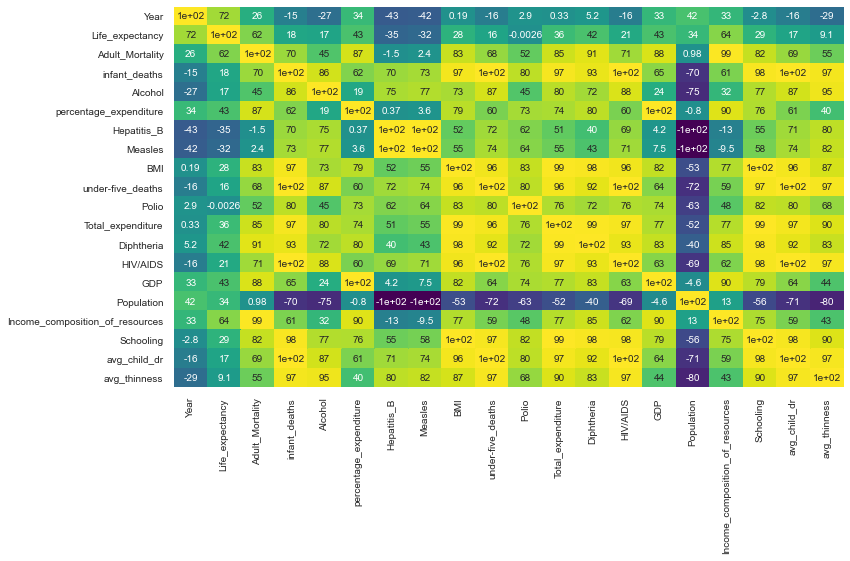

In [33]:
heatmap(df, 'Nigeria')

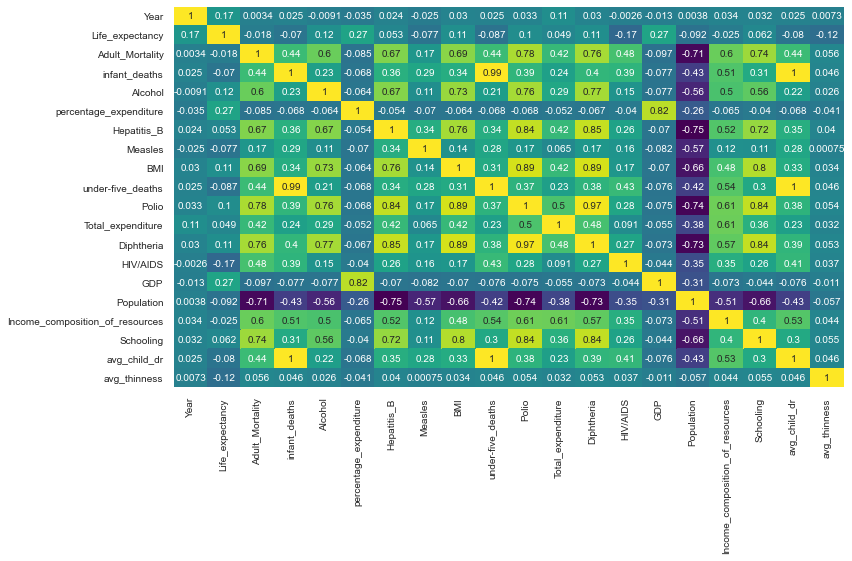

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True, cbar=False, cmap = 'viridis')

In [35]:
df = pd.get_dummies(df, drop_first=True, columns=['Status'])
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling', 'avg_child_dr',
       'avg_thinness', 'Status_Developing'],
      dtype='object')

In [36]:
ttest = df[df['Year']==2015]
train = df.drop(ttest.index)

X_test = ttest.drop(axis=1, columns='Life_expectancy')
y_test = ttest['Life_expectancy']

X_train = train.drop(axis=1, columns='Life_expectancy')
y_train = train['Life_expectancy']

df_ru = ttest[ttest['Country']=='Russian Federation']

In [37]:
def linear(df, country=None):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    lr = LinearRegression()
    if country == None:
        pass
    else:
        df = df[df['Country']==country]
    df = df.drop(axis=1, columns='Country')
    ttest = df[df['Year']==2015]
    train = df.drop(ttest.index)
    X_test = ttest.drop(axis=1, columns='Life_expectancy')
    y_test = ttest['Life_expectancy']

    X_train = train.drop(axis=1, columns='Life_expectancy')
    y_train = train['Life_expectancy']
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r_score = r2_score(y_test, pred)
    sns.distplot((y_test-pred),bins=50)
    plt.show()
    plt.scatter(y_test,pred)
    plt.xlabel('orig')
    plt.ylabel('pred')
    plt.show()
    coeff_df = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coefficient'])
    print(f'{coeff_df} \n \n \n')
    print(f'pred_min  : {pred.min()} \n pred_ma : {pred.max()}')
    print(f'mean abs error : {mae} \n mean squared error : {mse} \n r2_score : {r_score}')

In [45]:
country = 'Russian Federation'
linear(df, country)
#df = df.drop(axis=1, columns='Country')

KeyError: 'Country'

In [39]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


In [40]:
df = df.drop(axis=1, columns='Country')
df.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,avg_child_dr,avg_thinness,Status_Developing
0,2015.0,65.0,0.000008,0.000002,2.964149e-10,0.000002,0.000002,0.000034,5.661525e-07,0.000002,...,2.418746e-07,0.000002,2.964149e-09,0.000017,1.000000,1.419827e-08,2.993791e-07,0.000002,5.113157e-07,1
1,2014.0,59.9,0.000827,0.000195,3.052660e-08,0.000224,0.000189,0.001502,5.677948e-05,0.000263,...,2.497076e-05,0.000189,3.052660e-07,0.001870,0.999997,1.453066e-06,3.052660e-05,0.000229,5.342156e-05,1
2,2013.0,59.9,0.000008,0.000002,3.151424e-10,0.000002,0.000002,0.000014,5.704077e-07,0.000003,...,2.562108e-07,0.000002,3.151424e-09,0.000020,1.000000,1.481169e-08,3.119910e-07,0.000002,5.578020e-07,1
3,2012.0,59.5,0.000074,0.000019,2.704926e-09,0.000021,0.000018,0.000754,4.760669e-06,0.000025,...,2.304597e-06,0.000018,2.704926e-08,0.000181,1.000000,1.252381e-07,2.650827e-06,0.000022,4.855342e-06,1
4,2011.0,59.2,0.000092,0.000024,3.357281e-09,0.000002,0.000023,0.001012,5.774524e-06,0.000033,...,2.642180e-06,0.000023,3.357281e-08,0.000021,0.999999,1.524206e-07,3.189417e-06,0.000028,6.110252e-06,1


In [41]:
ttest = df[df['Year']==2015]
train = df.drop(ttest.index)
X_test = np.array(ttest.drop(axis=1, columns='Life_expectancy'))
y_test = np.array(ttest['Life_expectancy'])

X_train = train.drop(axis=1, columns='Life_expectancy')
y_train = train['Life_expectancy']
model = build_model()
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)
#pred = 
print(f'mse : {val_mse} \n mae : {val_mae}')

Epoch 1/10
2745/2745 [==============================] - 3s 1ms/step - loss: 509.5153 - mae: 17.4431
Epoch 2/10
2745/2745 [==============================] - 3s 1ms/step - loss: 157.2908 - mae: 9.8278
Epoch 3/10
2745/2745 [==============================] - 3s 1ms/step - loss: 114.9961 - mae: 8.6188
Epoch 4/10
2745/2745 [==============================] - 3s 1ms/step - loss: 101.8523 - mae: 8.1294
Epoch 5/10
2745/2745 [==============================] - 3s 986us/step - loss: 98.4710 - mae: 8.0205
Epoch 6/10
2745/2745 [==============================] - 3s 1ms/step - loss: 95.8896 - mae: 7.8971
Epoch 7/10
2745/2745 [==============================] - 3s 1ms/step - loss: 93.6439 - mae: 7.8241
Epoch 8/10
2745/2745 [==============================] - 3s 1ms/step - loss: 92.0383 - mae: 7.6797
Epoch 9/10
2745/2745 [==============================] - 3s 1ms/step - loss: 89.8281 - mae: 7.6109
Epoch 10/10
183/183 [==============================] - 0s 106us/step
mse : 81.46446824204075 
 mae : 7.82105112

In [42]:
import numpy as np

k = 4
num_val_samples = len(X_train) // k
num_epochs = 10
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_X_train, partial_y_train,
              epochs=num_epochs, batch_size=1, verbose=1)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/10
2059/2059 [==============================] - 2s 995us/step - loss: 331.5360 - mae: 14.2914
Epoch 2/10
2059/2059 [==============================] - 2s 970us/step - loss: 137.6764 - mae: 9.3993
Epoch 3/10
2059/2059 [==============================] - 2s 988us/step - loss: 108.3388 - mae: 8.3076
Epoch 4/10
2059/2059 [==============================] - 2s 1ms/step - loss: 97.9201 - mae: 7.9618
Epoch 5/10
2059/2059 [==============================] - 2s 1ms/step - loss: 95.4033 - mae: 7.8504
Epoch 6/10
2059/2059 [==============================] - 2s 963us/step - loss: 92.0648 - mae: 7.7151
Epoch 7/10
2059/2059 [==============================] - 2s 963us/step - loss: 92.2719 - mae: 7.7184
Epoch 8/10
2059/2059 [==============================] - 2s 964us/step - loss: 91.2836 - mae: 7.6909
Epoch 9/10
2059/2059 [==============================] - 2s 976us/step - loss: 89.9019 - mae: 7.6315
Epoch 10/10
686/686 [==============================] - 0s 44us/step
processing f

183/183 [==============================] - 0s 78us/step


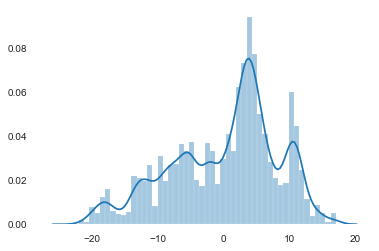

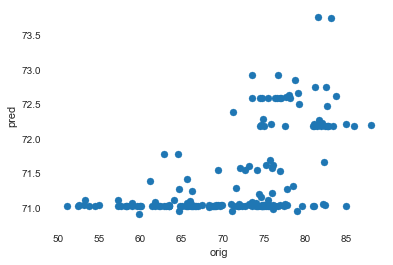

In [43]:
pred=model.predict(X_test, verbose=1)
sns.distplot((y_test-pred),bins=50)
plt.show()
plt.scatter(y_test,pred)
plt.xlabel('orig')
plt.ylabel('pred')
plt.show()

In [44]:
all_scores

[9.00731372833252, 6.662978649139404, 7.210219860076904, 7.438561916351318]

In [ ]:
ttest = df[df['Year']==2015]

train = df.drop(ttest.index)

In [ ]:
e,f = df.shape

In [ ]:
c+a == e

In [ ]:
df.sort_values('Year', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

In [ ]:
df.info(null_counts=True)

In [ ]:
df['Country']=df['Country'].astype('category')
df['Status']=df['Status'].astype('category')

In [ ]:
df['Country'].shape

In [ ]:
countries = list(df['Country'].value_counts().index)
count_map = {}
for country in countries:
    count_map[country] = countries.index(country)
df['num_country']=df['Country'].replace(list(count_map.keys()), list(count_map.values()))

In [ ]:
df.head()

In [ ]:
df_numeric=df.select_dtypes(include=['Int64','float64']).columns.to_list()

In [ ]:
df.columns

In [ ]:
mean = {}
for i in count_map.keys():
    mean[i] = df[df['Country']==i]['Total_expenditure'].mean()
    
    
dd = pd.DataFrame(data = [mean.keys(), mean.values()])
dd = dd.T
dd.columns = ['Country', 'value']
df.merge(dd, on=['Country'], how='left', suffixes=('old', 'new'))

In [ ]:
df.head()

In [ ]:
jj = df.groupby('Country').mean()
df_merge = df.merge(jj, on=['Country'], how='left', suffixes=('', '_new'))

In [ ]:
df_merge.drop(df.columns, axis=1)

In [ ]:
%matplotlib inline
plt.figure(figsize=(100,100))
sns.heatmap(df_merge.drop(df.columns, axis=1).isnull(), yticklabels=False)
plt.savefig('jjj.jpeg')

In [ ]:
df_merge.drop(df.columns, axis=1)

In [ ]:
mean['Nigeria']

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df.head()